In [295]:
import random
from time import time
import numpy as np

start = time()
def dado():
    a = random.randint(1,6)
    b = random.randint(1,6)
    valor = a+b
    return valor


pos_lugares = ["a1","a2","a3","a4","a5","b1","b2","b3","b4","b5", 
"c1", "c2", "c3", "c4", "c5", "d1", "d2", "d3", "d4", "d5", "e1", "e2", "e3", "e4", "e5"]

class Tablero:
    def __init__(self, usuario):

        self.user = usuario
        self.p = 0 # puntaje
        self.matriz = []
        self.msj = []

    def gen_tablero(self):
        xd = []
        a = [" "," "," "," "," "]
        i = 0
        while i < 5:
            xd.append(a[:])
            i += 1
        self.matriz = xd

    def print_tablero(self):
        def fill(s):
            if len(s) < 2:
                return " "+s
            else:
                return s    
        t = self.matriz[:]
        top = "#"*16
        second = "    a  b  c  d  e"
        print(top)
        print(second)
        co = 1
        for l in t:
            for i in range(len(l)):
                f = lambda x : fill(str(x))
                c = l[i]
                l[i] = f(c)

            s = "|".join(l)
            s = str(co) + ") |"+s+"|"
            print(s)
            co += 1
        print(top)   
    def contar_puntos(self):

        tablero = self.matriz
        mensajes = []
        # funciones aux
        puntos = 0
        def escalas_7():
            lista = []
            for i in range(3,8):
                esc = range(i,i+5)
                lista.append(list(esc))
            return lista
        def escalas_no7():
            lista = []
            for i in [2,8]:
                esc = range(i,i+5)
                lista.append(list(esc))
            return lista
        def full_f(lista):
            full = False
            for x in lista:
                if lista.count(x) == 3:
                    for y in lista:
                        if lista.count(y) == 2:
                            full = True
            return full
        def five(lista):
            for el in lista:
                if lista.count(el) == 5:
                    return True
            return False
        def poker(lista):
            for el in lista:
                if lista.count(el) == 4:
                    return True
            return False
        def trio(lista):
            for el in lista:
                if lista.count(el) == 3:
                    return True
            return False                        
        def dospar(lista):
            full = False
            for x in lista:
                if lista.count(x) == 2:
                    for y in lista:
                        if lista.count(y) == 2 and x != y:
                            full = True
            return full
        def par(lista):
            for x in lista:
                if lista.count(x) == 2:
                    return True
            return False            
        e7 = escalas_7()
        en7 = escalas_no7()
        
        # filas
        quintetos = tablero[:]
        for i in range(5):
            columna = []
            for j in range(5):
                columna.append(tablero[j][i]) ##### .strip()
            quintetos.append(columna)    
        diag = []
        line = []
        line2 = []
        for i in range(5):
            p = tablero[i][i]#.strip()
            p2 = tablero[-(i+1)][i]#.strip()
            line.append(p)
            line2.append(p2)    
        diag.append(line)
        diag.append(line2)
        for fila in quintetos:
            f  = sorted(list(map(int,fila)))
            # ojo, acá importa el orden en q se llaman las funciones
            pts = 0
            if f in e7:
                pts = 8
                puntos += pts   
            elif f in en7:
                pts = 12
                puntos += pts
            elif full_f(f): # acá los full 
                pts = 8
                puntos += pts
            elif five(f):
                pts = 10
                puntos += pts
            elif poker(f):
                pts = 6
                puntos += pts
            elif trio(f):
                pts = 3
                puntos += pts
            elif dospar(f):
                pts = 3
                puntos += pts
            elif par(f):
                pts = 1
                puntos += pts
            m = f"La fila/columna {fila} suma {pts} pts"    
            mensajes.append(m)                   
        # diagonales
        for fila in diag:
            f  = sorted(list(map(int,fila)))
            # ojo, acá importa el orden en q se llaman las funciones
            pts = 0
            if f in e7:
                pts = 16
                puntos += pts   
            elif f in en7:
                pts = 24
                puntos += pts
            elif full_f(f): # acá los full 
                pts = 16
                puntos += pts
            elif five(f):
                pts = 20
                puntos += pts
            elif poker(f):
                pts = 12
                puntos += pts
            elif trio(f):
                pts = 6
                puntos += pts
            elif dospar(f):
                pts = 6
                puntos += pts
            elif par(f):
                pts = 2
                puntos += pts
            m = f"La diagonal {fila} suma {pts} pts"
            mensajes.append(m)

        self.msj = mensajes
        return puntos    
    def colocar(self,pos,num):
        col = pos[0]
        fil = int(pos[1])
        col = "abcde".find(col)
        #print("col",col,"fil",fil)
        self.matriz[fil-1][col] = num



nn = 50000
ptjs = []
max_p = []
for i in range(nn):
    t = Tablero("Bot")
    t.gen_tablero()
    posiciones = pos_lugares[:]
    for j in range(25):
        d = dado()
        n = random.randint(0,len(posiciones)-1)
        pos = posiciones.pop(n)
        #print(pos)
        t.colocar(pos,d)
    p = t.contar_puntos()
    #print(t.msj)
    #print(f"Jugada {i}: {p} puntos")
    #t.print_tablero()
    ptjs.append(p)
    if p == max(ptjs):
        max_p.append([p,t.msj,i])


max_p.sort(key= lambda x:-x[0])
mejor = max_p[0]
peor = min(ptjs)
line = ""
for lines in mejor[1]:
    line += lines + "\n"


#print("Puntajes: ")
el_max = max(ptjs)
#print(ptjs)
avg = sum(ptjs)/len(ptjs)
ds = np.std(ptjs)
print("N:", nn)
print(f"Promedio: {avg}")
print(f"Desvest: {ds}")
print(f"Máximo: {el_max}")
print(f"Mínimo: {peor}")
print(line)
print(f"Tiempo: {time()-start}")

N: 50000
Promedio: 19.91864
Desvest: 7.34833726433402
Máximo: 66
Mínimo: 3
La fila/columna [5, 7, 2, 5, 7] suma 3 pts
La fila/columna [10, 6, 9, 9, 8] suma 1 pts
La fila/columna [7, 7, 9, 9, 9] suma 8 pts
La fila/columna [5, 7, 5, 8, 8] suma 3 pts
La fila/columna [7, 6, 3, 7, 7] suma 3 pts
La fila/columna [5, 10, 7, 5, 7] suma 3 pts
La fila/columna [7, 6, 7, 7, 6] suma 8 pts
La fila/columna [2, 9, 9, 5, 3] suma 1 pts
La fila/columna [5, 9, 9, 8, 7] suma 1 pts
La fila/columna [7, 8, 9, 8, 7] suma 3 pts
La diagonal [5, 6, 9, 8, 7] suma 16 pts
La diagonal [7, 7, 9, 9, 7] suma 16 pts

Tiempo: 31.960381746292114


Promedio: 19.91864
Desvest: 7.34833726433402
Máximo: 66
Mínimo: 3


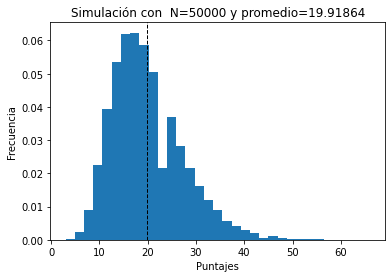

In [296]:
import matplotlib.pyplot as plt
plt.ylabel('Frecuencia')
plt.xlabel('Puntajes')
plt.title(f"Simulación con  N={nn} y promedio={avg}")
plt.axvline(avg, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(max_p, color='k', linestyle='dashed', linewidth=1)
print(f"Promedio: {avg}")
print(f"Desvest: {ds}")
print(f"Máximo: {el_max}")
print(f"Mínimo: {peor}")
plt.hist(ptjs, density=True, bins=(int(el_max*0.5)));
